<h1>Tesla Time Series Model</h1>
A time series model using the Polygon.io API.

In [2]:
#import necessary libraries
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt
import seaborn as sns
import requests
import warnings;
warnings.simplefilter('ignore')
today = date.today()

In [4]:
#input all parameters
api_key = "XXXXX"
stock_ticker = "TSLA"
start_date = "2020-01-01"
end_date = today.strftime("%Y-%m-%d")
#input future length
periods = 60

In [5]:
get_request = "https://api.polygon.io/v2/aggs/ticker/" + stock_ticker + "/range/1/day/" + start_date + "/" + end_date + "?adjusted=true&sort=asc&limit=50000&apiKey=" + api_key
request = requests.get(get_request)

In [6]:
#create dataframe
df1 = pd.read_json(request.content)
df = pd.DataFrame(df1.results.values.tolist())
df.columns = ['volume', 'volume_weighted_avg_price', 'open_price', 'close_price', 'high', 'low', 'time', 'transactions']
df.head()

,volume,volume_weighted_avg_price,open_price,close_price,high,low,time,transactions
0,71124155.0,142.0028,140.796,146.422,146.800,137.742,1587528000000,283997
1,66183485.0,144.1158,145.520,141.126,146.800,140.626,1587614400000,253702
2,66178370.0,142.9759,142.162,145.030,146.146,139.636,1587700800000,235377
3,103407210.0,156.7946,147.522,159.750,159.898,147.000,1587960000000,433976
4,76109820.0,155.3722,159.128,153.824,161.000,151.338,1588046400000,313307


In [7]:
#convert Unix time to Y/M/D
df['date'] = df['time'].apply(lambda x: date.fromtimestamp(x/1000).strftime('%Y-%m-%d'))
df.drop(columns=['time'], inplace=True)
df.head()

,volume,volume_weighted_avg_price,open_price,close_price,high,low,transactions,date
0,71124155.0,142.0028,140.796,146.422,146.800,137.742,283997,2020-04-22
1,66183485.0,144.1158,145.520,141.126,146.800,140.626,253702,2020-04-23
2,66178370.0,142.9759,142.162,145.030,146.146,139.636,235377,2020-04-24
3,103407210.0,156.7946,147.522,159.750,159.898,147.000,433976,2020-04-27
4,76109820.0,155.3722,159.128,153.824,161.000,151.338,313307,2020-04-28


<h1>Prophet Time Series:</h1>

In [8]:
#import prophet, create dataframe, and fit model
from prophet import Prophet
close_price_df = df[['date','close_price']]
close_price_df.columns = ['ds', 'y']
close_price_df['ds'] = pd.DatetimeIndex(close_price_df['ds'])
model = Prophet(interval_width = .95, daily_seasonality=True)
model.fit(close_price_df)


Importing plotly failed. Interactive plots will not work.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
#create future
future = model.make_future_dataframe(periods)
#predict with prophet model
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
560,2022-06-16,930.971438,775.539407,1072.442207
561,2022-06-17,927.549861,766.427588,1080.648066
562,2022-06-18,938.044034,787.183061,1089.225304
563,2022-06-19,937.717843,774.802270,1093.401721
564,2022-06-20,933.217606,773.777788,1084.080740


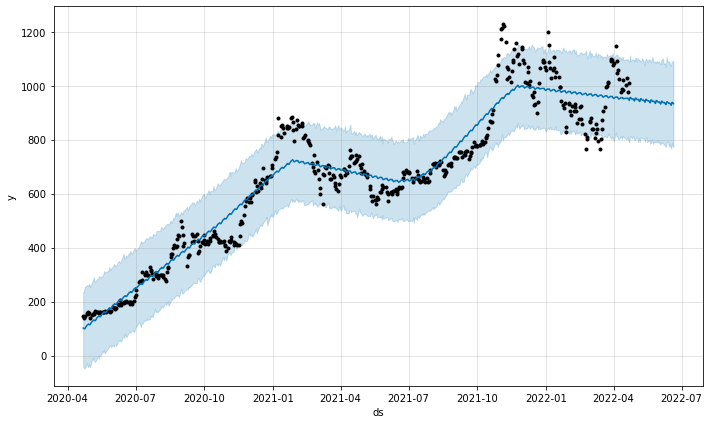

In [10]:
fig1 = model.plot(forecast)

Above, we have a plot of the stock price data points, with the line of the Time Series plotted throughout. For Tesla during this period, we can see that the model wasn't of particular use, differing about 5% from the stock price during the few following days of running the model (4/21/2022).

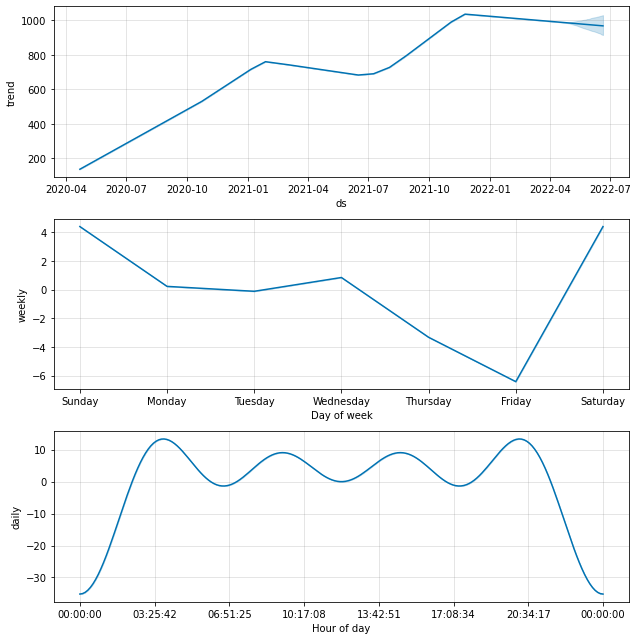

In [11]:
fig2 = model.plot_components(forecast)

Above, the three plots show the component importance. This will be different for each model.